### Image classification

In [3]:

import os
import torch

# Verify GPU and environment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Active Conda Env: {os.environ.get('CONDA_DEFAULT_ENV')}")
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"Using Device: {device}")
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"VRAM Allocated: {torch.cuda.memory_allocated(0)/1024**2:.2f} MiB")

Active Conda Env: ai_env
CUDA Available: True
Using Device: cuda
GPU Name: NVIDIA GeForce MX450
VRAM Allocated: 0.00 MiB


In [7]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 231s 1us/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


In [9]:
print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Unique classes:", np.unique(y_train))


Training Data Shape: (50000, 32, 32, 3)
Testing Data Shape: (10000, 32, 32, 3)
Training Labels Shape: (50000, 1)
Unique classes: [0 1 2 3 4 5 6 7 8 9]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


In [16]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Class names for plotting
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [17]:
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))

# Convolutional Block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

# Convolutional Block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Prevent overfitting
model.add(Dense(10, activation='softmax'))  # Output layer


c:\Users\hp\miniconda3\envs\ai_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [19]:
history = model.fit(x_train, y_train_cat, 
                    epochs=10, 
                    batch_size=64,
                    validation_data=(x_test, y_test_cat))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.3200 - loss: 1.8329 - val_accuracy: 0.5359 - val_loss: 1.3010
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.5547 - loss: 1.2376 - val_accuracy: 0.6503 - val_loss: 0.9954
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.6460 - loss: 1.0115 - val_accuracy: 0.6747 - val_loss: 0.9465
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.6901 - loss: 0.8931 - val_accuracy: 0.6853 - val_loss: 0.8945
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.7225 - loss: 0.8056 - val_accuracy: 0.7166 - val_loss: 0.8174
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7459 - loss: 0.7335 - val_accuracy: 0.7199 - val_loss: 0.7950
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.7684 - loss: 0.6631 - val_accuracy: 0.7302 - val_loss: 0.7783
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.7834 - loss: 0.6126 - 

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.7404999732971191


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


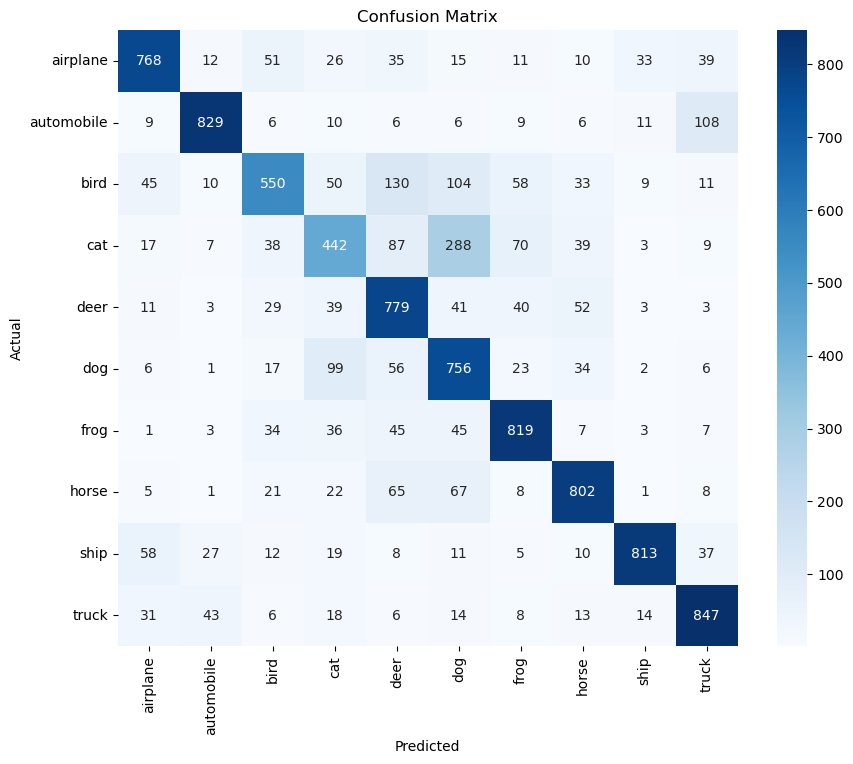

              precision    recall  f1-score   support

    airplane       0.81      0.77      0.79      1000
  automobile       0.89      0.83      0.86      1000
        bird       0.72      0.55      0.62      1000
         cat       0.58      0.44      0.50      1000
        deer       0.64      0.78      0.70      1000
         dog       0.56      0.76      0.64      1000
        frog       0.78      0.82      0.80      1000
       horse       0.80      0.80      0.80      1000
        ship       0.91      0.81      0.86      1000
       truck       0.79      0.85      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



In [21]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=class_names))
# Save the model
model.save('cifar10_cnn_model.h5')
# Load the model


### Using transfer learning with pretrained models with ResNet50

In [40]:
# CNN Transfer Learning on CIFAR-10 using ResNet50

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Parameters
batch_size = 32
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [41]:
# Custom preprocessing function
IMG_SIZE = (224, 224)
def resize_and_preprocess(img):
    img = tf.image.resize(img, IMG_SIZE)
    return preprocess_input(img)

# Use tf.data to avoid memory issues
AUTOTUNE = tf.data.AUTOTUNE


In [42]:
def prepare_dataset(x, y, is_training=True):
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    if is_training:
        dataset = dataset.shuffle(buffer_size=10000)
    dataset = dataset.map(lambda img, label: (resize_and_preprocess(tf.cast(img, tf.float32)), label), num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(batch_size).prefetch(AUTOTUNE)
    return dataset

train_size = int(0.9 * len(x_train))
x_train_main, x_val = x_train[:train_size], x_train[train_size:]
y_train_main, y_val = y_train_cat[:train_size], y_train_cat[train_size:]

train_ds = prepare_dataset(x_train_main, y_train_main, is_training=True)
val_ds = prepare_dataset(x_val, y_val, is_training=False)
test_ds = prepare_dataset(x_test, y_test_cat, is_training=False)


In [43]:

# Load ResNet50 without top
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [44]:
# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])


In [45]:
# Compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [51]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU devices:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.19.0
GPU devices: []


In [52]:
# Verify GPU and environment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Active Conda Env: {os.environ.get('CONDA_DEFAULT_ENV')}")
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"Using Device: {device}")
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"VRAM Allocated: {torch.cuda.memory_allocated(0)/1024**2:.2f} MiB")


# Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Active Conda Env: ai_env
CUDA Available: True
Using Device: cuda
GPU Name: NVIDIA GeForce MX450
VRAM Allocated: 3.81 MiB
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2212s 2s/step - accuracy: 0.8720 - loss: 0.3682 - val_accuracy: 0.9016 - val_loss: 0.2827
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2206s 2s/step - accuracy: 0.9115 - loss: 0.2566 - val_accuracy: 0.9036 - val_loss: 0.2700
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2231s 2s/step - accuracy: 0.9263 - loss: 0.2140 - val_accuracy: 0.9104 - val_loss: 0.2524
Epoch 4/10
1271/1407 ━━━━━━━━━━━━━━━━━━━━ 3:31 2s/step - accuracy: 0.9342 - loss: 0.1866

KeyboardInterrupt: 

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(test_ds)
print("\nTest Accuracy with ResNet50:", test_acc)

# Predict and Confusion Matrix
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.vstack([y for _, y in test_ds]), axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))
